In [1]:
from prophet import Prophet

/home/choclo/anaconda3/envs/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd

df_data = pd.read_csv("https://raw.githubusercontent.com/jonasdieckmann/prophet_tutorial/main/passengers.csv")

df_data_train = df_data[df_data["Month"] < "2023-01"]
df_data_test = df_data[df_data["Month"] >= "2023-01"]

display(df_data_train)

,Month,Passengers
0,2012-01,112
1,2012-02,118
2,2012-03,132
3,2012-04,129
4,2012-05,121
...,...,...
127,2022-08,559
128,2022-09,463
129,2022-10,407
130,2022-11,362


/tmp/ipykernel_20656/1412990368.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  decompose.plot().show()


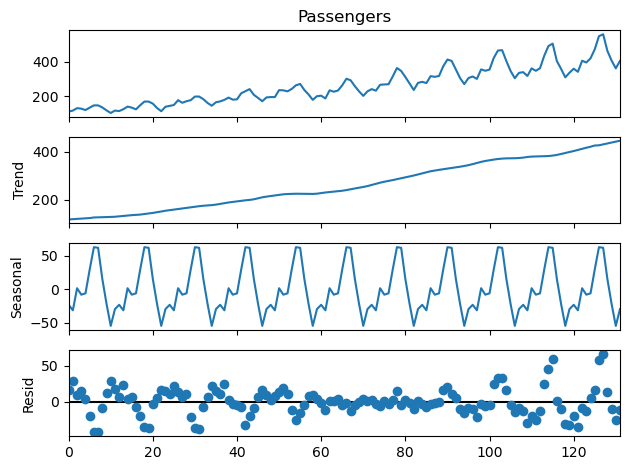

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Passengers, model='additive', extrapolate_trend='freq', period=12)

decompose.plot().show()

In [6]:
df_train_prophet = df_data_train

# date variable needs to be named "ds" for prophet
df_train_prophet = df_train_prophet.rename(columns={"Month": "ds"})

# target variable needs to be named "y" for prophet
df_train_prophet = df_train_prophet.rename(columns={"Passengers": "y"})

In [7]:
model_prophet  = Prophet()
model_prophet.fit(df_train_prophet)


11:40:13 - cmdstanpy - INFO - Chain [1] start processing
11:40:13 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
df_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
display(df_future)

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
139,2023-08-01
140,2023-09-01
141,2023-10-01
142,2023-11-01


In [10]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
139,2023-08-01,532.0,507.0,558.0
140,2023-09-01,484.0,459.0,508.0
141,2023-10-01,446.0,422.0,471.0
142,2023-11-01,416.0,391.0,440.0
143,2023-12-01,449.0,422.0,473.0


/home/choclo/anaconda3/envs/env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/choclo/anaconda3/envs/env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/tmp/ipykernel_20656/219420338.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

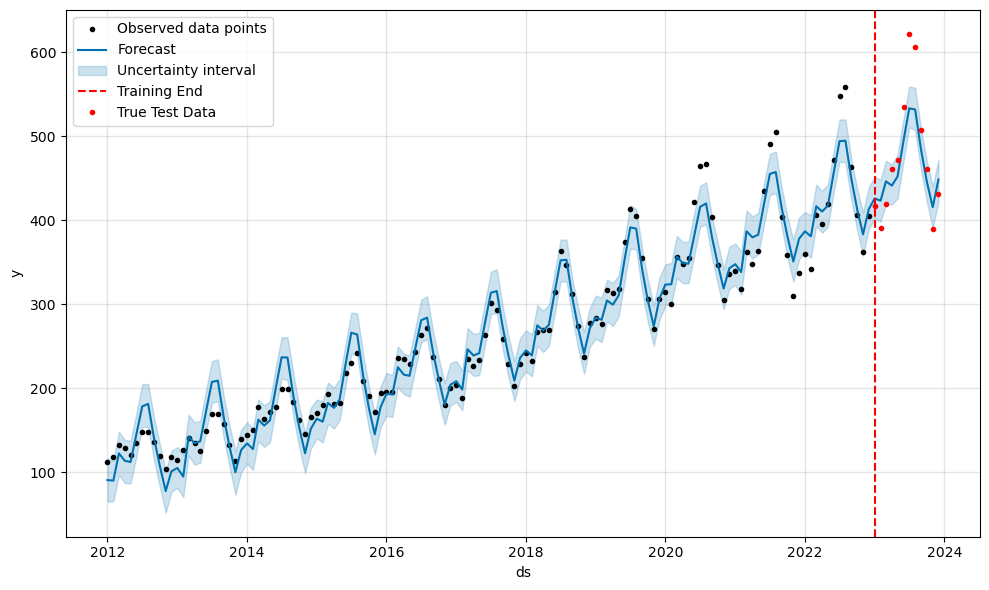

In [11]:
import matplotlib.pyplot as plt

# plot the time series 
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(df_data_test['Month'], df_data_test['Passengers'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()